In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

In [2]:
checkpoints = r'C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\computer vision\train'
validation_dir = r'C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\computer vision\validation'
test_dir = r'C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\computer vision\test'

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(256, 256, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [6]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(1e-4), metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
                                                    train_dir,
                                                    target_size=(256, 256),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
                                                        validation_dir,
                                                        target_size=(256, 256),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(256, 256), batch_size=32,class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(256, 256),batch_size=32,class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 252 images belonging to 4 classes.


In [9]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [10]:
model_history = model.fit(train_generator,
                         validation_data =validation_generator,
                         steps_per_epoch=train_generator.n//train_generator.batch_size,
                         validation_steps = validation_generator.n//validation_generator.batch_size,
                         epochs = 5,
                         callbacks = callbacks)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 1.1020 - acc: 0.5238
Epoch 1: val_loss improved from inf to 0.58519, saving model to C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\E1-cp-0001-loss0.59.h5
50/50 [==============================] - 156s 3s/step - loss: 1.1020 - acc: 0.5238 - val_loss: 0.5852 - val_acc: 0.7679
Epoch 2/5
50/50 [==============================] - ETA: 0s - loss: 0.5872 - acc: 0.7375
Epoch 2: val_loss improved from 0.58519 to 0.53219, saving model to C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\E1-cp-0002-loss0.53.h5
50/50 [==============================] - 153s 3s/step - loss: 0.5872 - acc: 0.7375 - val_loss: 0.5322 - val_acc: 0.7589
Epoch 3/5
50/50 [==============================] - ETA: 0s - loss: 0.4825 - acc: 0.7887
Epoch 3: val_loss improved from 0.53219 to 0.38378, saving model to C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\E1-cp-0003-loss0.38.h5
50/50 [==============================] - 153s 3s/step - loss: 0.4825 - 

In [11]:
model_history.history

{'loss': [1.102028727531433,
  0.5872339606285095,
  0.48253417015075684,
  0.39106982946395874,
  0.35772523283958435],
 'acc': [0.5237500071525574,
  0.737500011920929,
  0.7887499928474426,
  0.8268749713897705,
  0.8381249904632568],
 'val_loss': [0.5851851105690002,
  0.5321911573410034,
  0.383777916431427,
  0.33855605125427246,
  0.31602758169174194],
 'val_acc': [0.7678571343421936,
  0.7589285969734192,
  0.8080357313156128,
  0.8214285969734192,
  0.8482142686843872]}

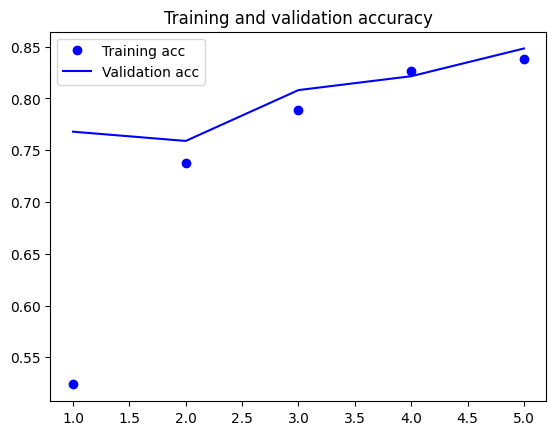

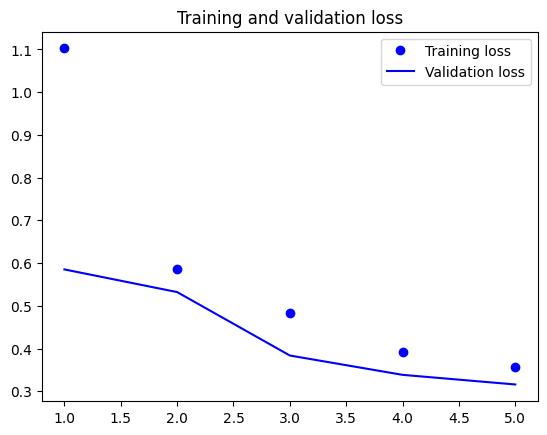

<Figure size 640x480 with 0 Axes>

In [12]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\model_Accuracy.png')

Found 200 images belonging to 4 classes.
7/7 [==============================] - 6s 786ms/step


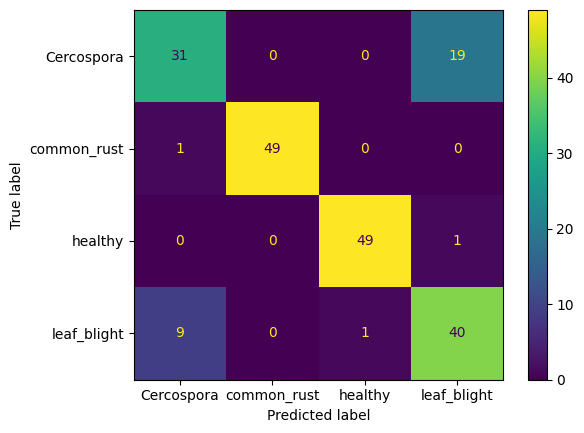

In [14]:
model = load_model(r'C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\E1-cp-0005-loss0.32.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(256, 256), batch_size=32, shuffle=False, class_mode='categorical')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora', 'common_rust','healthy', 'leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Muhammad Luqman\Desktop\lab-13-21jzele0444\confusion_matrics.jpg')

In [ ]:
print(classification_report(label, pred, target_names=['Cercospora', 'common_rust','healthy', 'leaf_blight']))